# Identify Species From Coverage

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
cov_file_sample1 = "output_bed_NS.2209.003.UDP0161_i7---UDP0161_i5.fRS1_.rg.sorted.bam"
cov_file_sample2 = "output_bed_NS.2209.003.UDP0163_i7---UDP0163_i5.fRS757_.rg.sorted.bam"
cov_file_sample3 = "output_bed_NS.2209.003.UDP0167_i7---UDP0167_i5.A12_.rg.sorted.bam"


df1 = pd.read_csv(cov_file_sample1, sep='\t', names=['Species', 'start', 'end', 'sample 1'])
df2 = pd.read_csv(cov_file_sample2, sep='\t', names=['Species', 'start', 'end', 'sample 2'])
df3 = pd.read_csv(cov_file_sample3, sep='\t', names=['Species', 'start', 'end', 'sample 3'])



df1

,Species,start,end,sample 1
0,Aspergillusfumigatus,6516,6535,64
1,Aspergillusfumigatus,15351,15370,76
2,Candidaalbicans,0,2,1197
3,Candidaalbicans,2,4,1199
4,Candidaalbicans,4,5,1201
...,...,...,...,...
40373,Pichiakudriavzevii,9397,9417,44
40374,Pichiakudriavzevii,9521,9524,66
40375,Pichiakudriavzevii,9524,9540,92
40376,Pichiakudriavzevii,9540,9541,31


In [3]:
df1_grouped = df1.groupby(['Species']).median()
df1_grouped_dropped = df1_grouped.drop(columns=['start', 'end'])
df1_grouped_dropped_indexed = df1_grouped_dropped.reset_index()

df2_grouped = df2.groupby(['Species']).median()
df2_grouped_dropped = df2_grouped.drop(columns=['start', 'end'])
df2_grouped_dropped_indexed = df2_grouped_dropped.reset_index()

df3_grouped = df3.groupby(['Species']).median()
df3_grouped_dropped = df3_grouped.drop(columns=['start', 'end'])
df3_grouped_dropped_indexed = df3_grouped_dropped.reset_index()

df1_grouped_dropped_indexed

,Species,sample 1
0,Aspergillusfumigatus,70.0
1,Candidaalbicans,846.0
2,Candidaauris,64.0
3,Candidaparapsilosis,319.0
4,Candidatropicalis,198.0
5,Cryptococcusneoformans,155.0
6,Nasakeomycesglabrata,140.0
7,Pichiakudriavzevii,48.0


In [4]:
df_final = pd.DataFrame()

df_final['Species'] = ['A. fumigatus', 'C. albicans', 'C. auris', 'C. parapsilosis', 'C. tropicalis', 'C. neoformans', 'N. glabrata', 'P. kudriavzevii']

df_final['sample 1'] = df1_grouped_dropped_indexed['sample 1']
df_final['sample 2'] = df2_grouped_dropped_indexed['sample 2']
#df_final['sample 3'] = df3_grouped_dropped_indexed['sample 3'] # Sample 3 is erronous

df_final

,Species,sample 1,sample 2
0,A. fumigatus,70.0,80.0
1,C. albicans,846.0,857.0
2,C. auris,64.0,83.0
3,C. parapsilosis,319.0,326.5
4,C. tropicalis,198.0,212.0
5,C. neoformans,155.0,168.0
6,N. glabrata,140.0,131.5
7,P. kudriavzevii,48.0,75.0


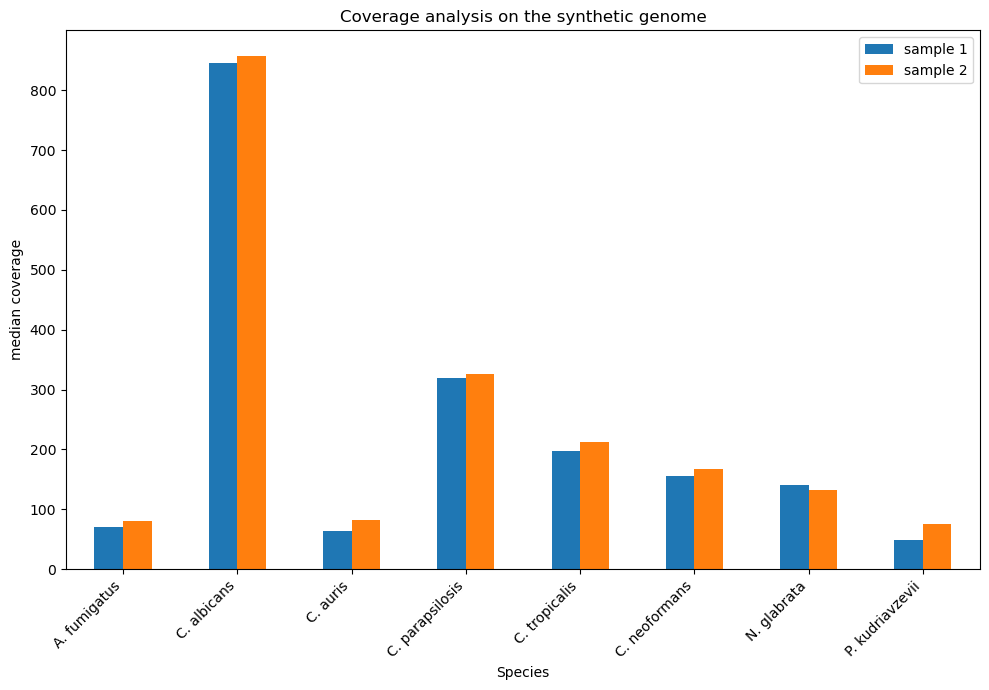

In [5]:
from matplotlib.transforms import Bbox

df_final.plot.bar(x='Species', figsize=(10,7),
                       title="Coverage analysis on the synthetic genome",
                       ylabel="median coverage")

plt.xticks(rotation=45, ha='right')

plt.savefig('SpeciesIdentification.svg', format='svg', bbox_inches='tight')
plt.tight_layout()
plt.show()